In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

# Item XII

Let $\ddot{y}(t)-\mu (1-y^2(t)) \dot{y}(t) + y(t) = 0$, with $y(0)=2$ , $\dot{y}(0)=0$, and $\mu = 1234$.
1. Approximate the solution by means of a Taylor series expansion about $t=0$.
2. Implement a numerical solver for it. *You may not use scipy but you can use numpy*.
3. Compare both solutions and comment on the comparison.
---

## Part 1

We do the approximation:
\begin{align}
y(t) &= y(0) + t \dot{y}(0) + \frac{1}{2} t^2 \ddot{y}(0)
\\ &= 2 + \frac{1}{2}t^2\ddot{y}(0) \,.
\end{align}

In order to compute $\ddot{y}(0)$ we use the equation given, at $t=0$:
\begin{align}
\ddot{y}(0) - \mu(1-y^2(0)) \dot{y}(0) + y(0) &= 0
\\ \ddot{y}(0) &= -y(0)
\\ &= -2 \, .
\end{align}

And the approximation is $$y(t) = 2-t^2 \,.$$

## Part 2

In [2]:
# Euler's method as a higher order function:
def euler(yp=lambda y,t:1,yi=0,tmin=0,tmax=1.0,steps=400):
    delta = (tmax-tmin)/float(steps)
    t = tmin
    ys = []
    ys.append(yi)
    for i in range(steps):
        t = tmin+delta*i
        yp_next = yp(ys[-1],t)
        y_next = ys[-1]+delta*yp_next
        ys.append(y_next)
    return ys

We use it in the following way:

$$
\begin{bmatrix} y_{t+1} \\ \dot{y}_{y+1} \end{bmatrix}
=
\begin{bmatrix} \dot{y}_{t} \\ \ddot{y}(t) \end{bmatrix} \Delta t
+ 
\begin{bmatrix} y_{t} \\ \dot{y}_t \end{bmatrix} \Delta t
$$

remembering that
$$
\ddot{y}(t) = \mu (1-y^2(t)) \dot{y}(t) - y(t) = 0
$$

In [3]:
mu = 1234
N = 40000
YF = 4.0
xs = np.linspace(0,YF,num=N+1)
# --- Approximation with Taylor
y_tay = 2-xs**2.0
# --- Solution:
fn = lambda ys,t: np.array([ys[1], mu*(1-ys[0]**2)*ys[1] - ys[0]])
yini = np.array([2,0])
result = euler(fn,yini,tmin=0,tmax=YF,steps=N)
y_sol = [a[0] for a in result]
yp_sol = [a[1] for a in result]
# --- Print values at some points:
NS = (N//4,N//2,N*3//4,N)
print("Taylor:")
for i in NS:
    print("\ty(%f) = %f"%(xs[i],y_tay[i]))
print("Euler's:")
for i in NS:
    print("\ty(%f) = %f"%(xs[i],y_sol[i]))

Taylor:
	y(1.000000) = 1.000000
	y(2.000000) = -2.000000
	y(3.000000) = -7.000000
	y(4.000000) = -14.000000
Euler's:
	y(1.000000) = 1.999460
	y(2.000000) = 1.998919
	y(3.000000) = 1.998378
	y(4.000000) = 1.997837


## Part 3

Plot both solutions:

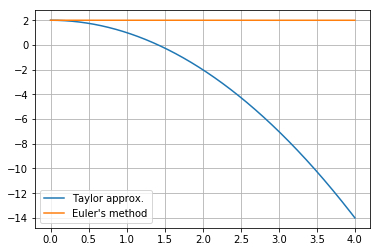

In [4]:
plt.plot(xs,y_tay,label="Taylor approx.")
plt.plot(xs,y_sol,label="Euler's method")
plt.grid()
plt.legend()
plt.show()

It can be seen that the Talor's approximation is bad as it doens't consider that $y''(t)$ is really small except on $t=0$ (due the large value of $\mu$).

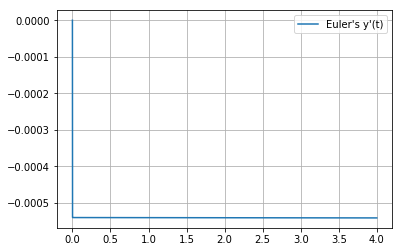

In [5]:
plt.plot(xs,yp_sol,label="Euler's y'(t)")
plt.grid()
plt.legend()
plt.show()